<a href="https://colab.research.google.com/github/chantikanr/ChantikaNuramalia-ANDAT-/blob/main/333321010100_Chantika_Nuramalia_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


Data contains details of various drugs (used for conditions like Acne, Cancer, Heart Disease, etc. ) and their side effects

Drugs detail URLs were collected from following dataset

https://www.kaggle.com/datasets/jithinanievarghese/drugs-side-effects-and-medical-condition

**1.1 Importing Library**

Enter the following syntax to include the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

For the dataset use this syntax

In [2]:
!gdown 17IVFL0JLa_5ynA4O3OosVgUArTG7UO1F

Downloading...
From: https://drive.google.com/uc?id=17IVFL0JLa_5ynA4O3OosVgUArTG7UO1F
To: /content/drugs_side_effects_drugs_com.csv
100% 11.6M/11.6M [00:00<00:00, 74.0MB/s]


In [3]:
import pandas as pd
dataset = pd.read_csv('/content/drugs_side_effects_drugs_com.csv')
dataset

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


## 2. Exploratory Data

To find the number of rows and columns you can use the following syntax

In [4]:
dataset.shape

(2931, 17)

To see a list containing the column names of a dataset, you can use the following syntax

In [5]:
dataset.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

To see the data type of each column can use this following syntax

In [6]:
dataset.dtypes

drug_name                         object
medical_condition                 object
side_effects                      object
generic_name                      object
drug_classes                      object
brand_names                       object
activity                          object
rx_otc                            object
pregnancy_category                object
csa                               object
alcohol                           object
related_drugs                     object
medical_condition_description     object
rating                           float64
no_of_reviews                    float64
drug_link                         object
medical_condition_url             object
dtype: object

To view summary information about a dataset, you can use the following syntax

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

To get the number of unique values ​​from each column in a dataset, you can use the following syntax

In [8]:
dataset.nunique()

drug_name                        2912
medical_condition                  47
side_effects                     2759
generic_name                     1392
drug_classes                      274
brand_names                      1552
activity                           93
rx_otc                              3
pregnancy_category                  6
csa                                 7
alcohol                             1
related_drugs                     535
medical_condition_description      47
rating                             86
no_of_reviews                     301
drug_link                        2931
medical_condition_url              47
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [9]:
dataset.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

Use the following syntax to find out the data type of each datasets column

In [10]:
dataset['side_effects'].dtypes

dtype('O')

In [11]:
dataset['generic_name'].dtypes

dtype('O')

In [12]:
dataset['drug_classes'].dtypes

dtype('O')

In [13]:
dataset['brand_names'].dtypes

dtype('O')

In [14]:
dataset['rx_otc'].dtypes

dtype('O')

In [15]:
dataset['pregnancy_category'].dtypes

dtype('O')

In [16]:
dataset['alcohol'].dtypes

dtype('O')

In [17]:
dataset['related_drugs'].dtypes

dtype('O')

In [18]:
dataset['rating'].dtypes

dtype('float64')

In [19]:
dataset['no_of_reviews'].dtypes

dtype('float64')

Perform imputer to handle missing value in numerical data

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [21]:
imputer = imputer.fit(dataset[['rating', 'no_of_reviews']])
imputer

SimpleImputer()

In [22]:
dataset[['rating', 'no_of_reviews']] = imputer.transform(dataset[['rating', 'no_of_reviews']])
dataset.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                              0
no_of_reviews                       0
drug_link                           0
medical_condition_url               0
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [23]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

drug_name                        0
medical_condition                0
activity                         0
csa                              0
medical_condition_description    0
rating                           0
no_of_reviews                    0
drug_link                        0
medical_condition_url            0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [24]:
dataset = dataset.drop('medical_condition_description', axis=1)
dataset

,drug_name,medical_condition,activity,csa,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,87%,N,6.800000,760.000000,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,82%,N,7.200000,449.000000,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,48%,N,5.700000,482.000000,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,41%,N,7.900000,623.000000,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,39%,N,7.400000,146.000000,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,2%,3,7.500000,17.000000,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,1%,4,6.812926,75.064943,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,0%,3,6.812926,75.064943,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,0%,N,6.812926,75.064943,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

To generate descriptive statistical summaries of each column in a dataset, you can use the following syntax:

In [25]:
dataset.describe()

,rating,no_of_reviews
count,2931.000000,2931.000000
mean,6.812926,75.064943
std,1.701237,135.993992
min,0.000000,1.000000
25%,6.800000,10.000000
50%,6.812926,75.064943
75%,7.300000,75.064943
max,10.000000,2934.000000


Use this syntax to make data visualization

<Axes: >

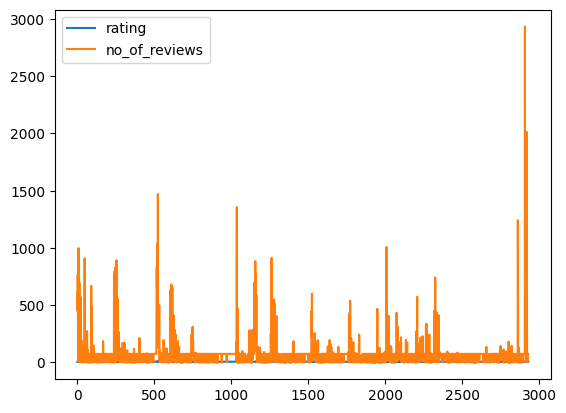

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

Use this following syntax to create a box plot of the datasets

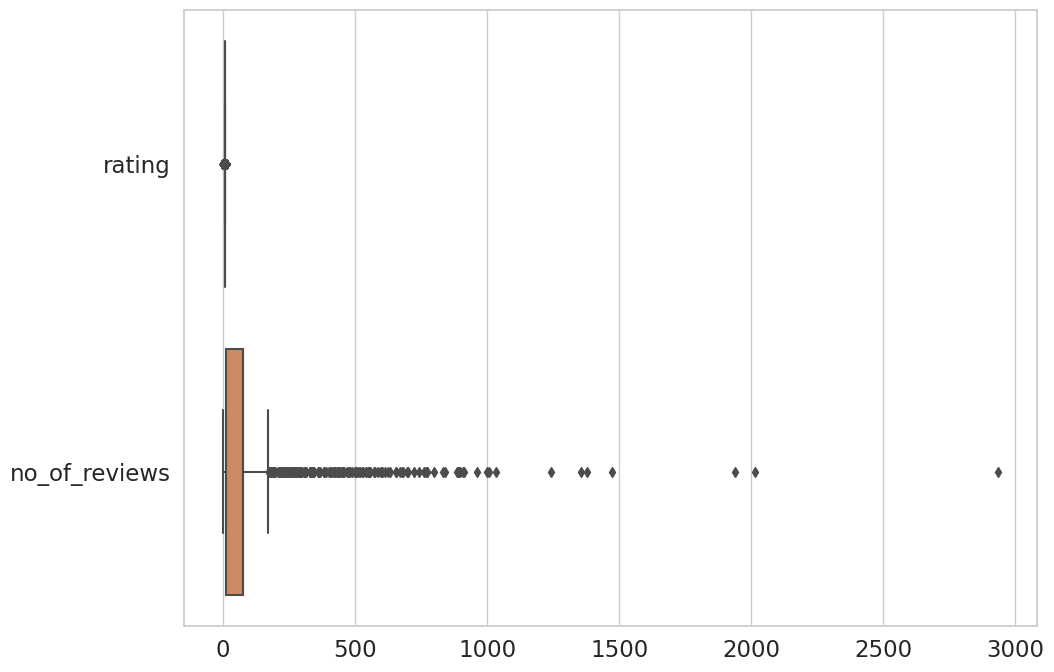

In [27]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Use the following syntax to create a scatter plot then replace the dataset and axis labels with rating and no_of_reviews values

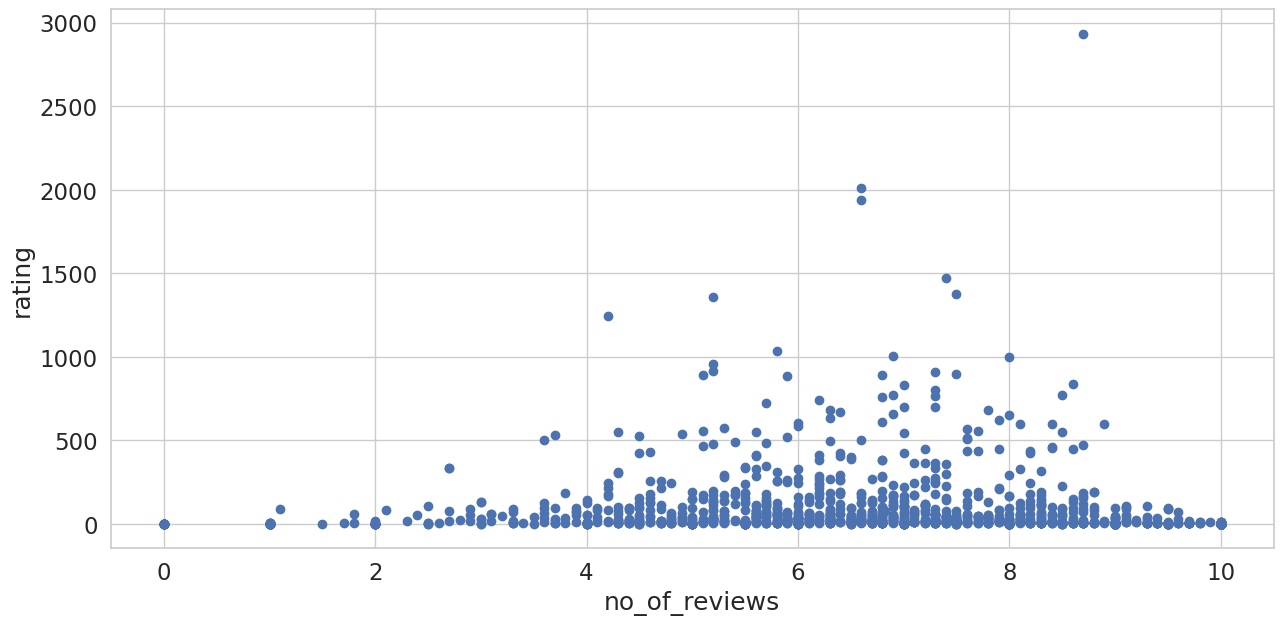

In [28]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['rating'], dataset['no_of_reviews'])
 
# x-axis label
ax.set_xlabel('no_of_reviews')
 
# y-axis label
ax.set_ylabel('rating')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

Use the syntax to calculate the interquartile range (IQR) of column 'no_of_reviews' in the dataset

In [29]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['no_of_reviews'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['no_of_reviews'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (2931, 8)


To identify any outliers in the 'Number of Employees' column of the dataset and remove them to create a new modified data set, use the following syntax:

In [30]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['no_of_reviews'] > upper].index
outliers_lower = dataset[dataset['no_of_reviews'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (2753, 8)


To identify any outliers in the 'Net Income in Euro' column of the dataset, you can use the following syntax

In [31]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['rating'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['rating'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (2753, 8)


To identify any outliers in the 'Net Income in Euro' column of the dataset and remove them to create a new modified data set you can use the following syntax

In [32]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['rating'] > upper].index
outliers_lower = dataset[dataset['rating'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (1677, 8)


To import the seaborn library, you can use the following syntax

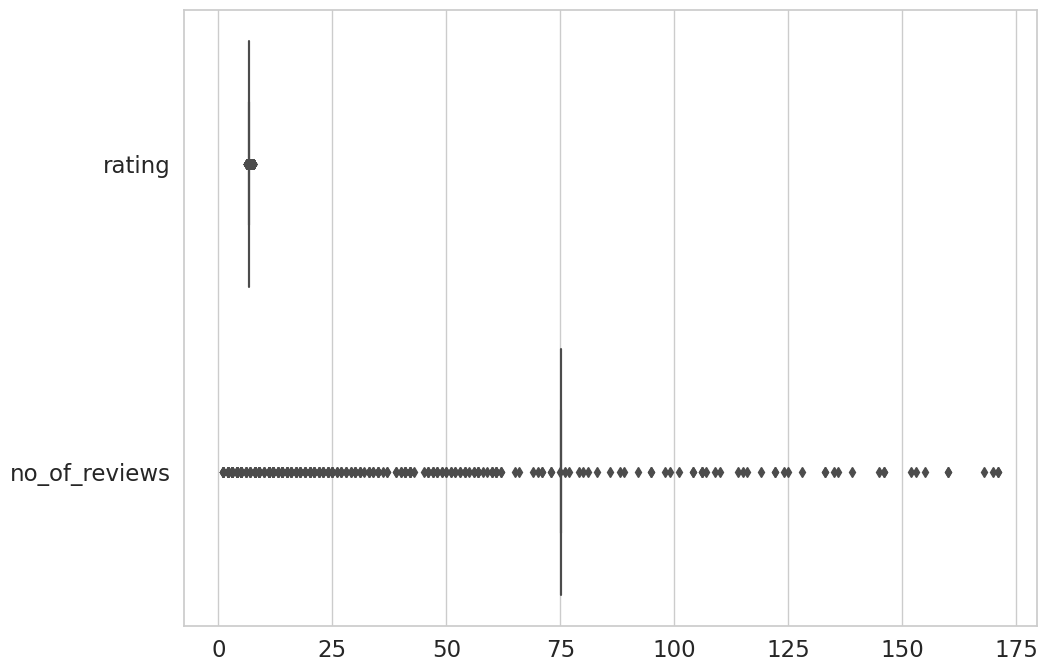

In [33]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

To display the scatter plot of the dataset column whose outliers have been removed, the following syntax is used

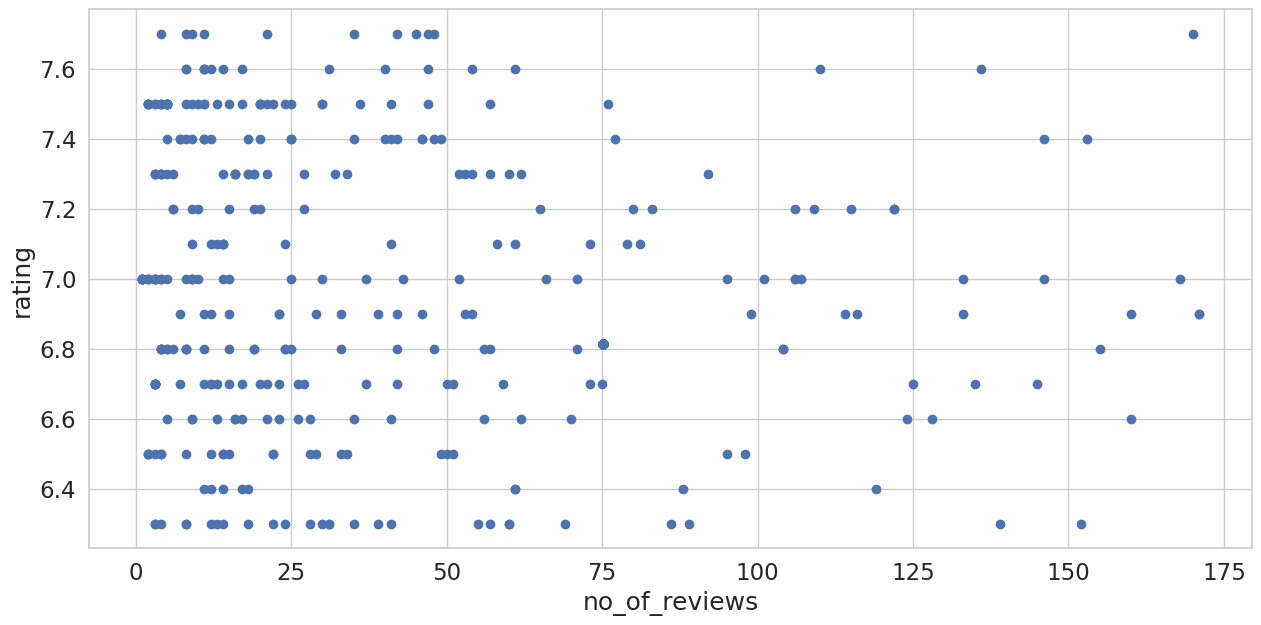

In [34]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['no_of_reviews'], dataset['rating'])
 
# x-axis label
ax.set_xlabel('no_of_reviews')
 
# y-axis label
ax.set_ylabel('rating')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

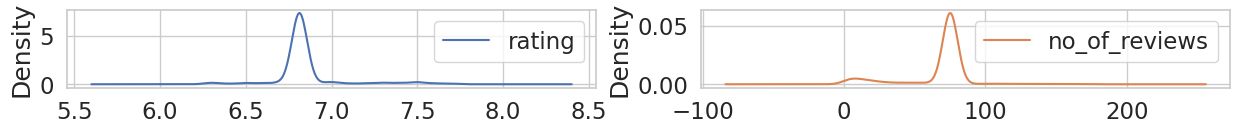

In [35]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

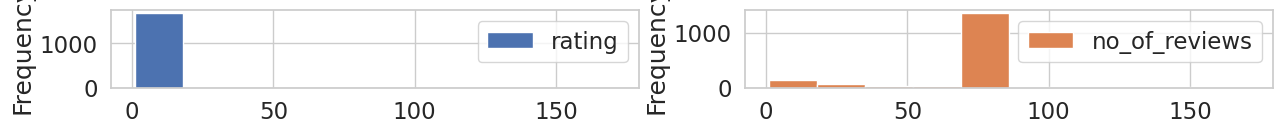

In [36]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

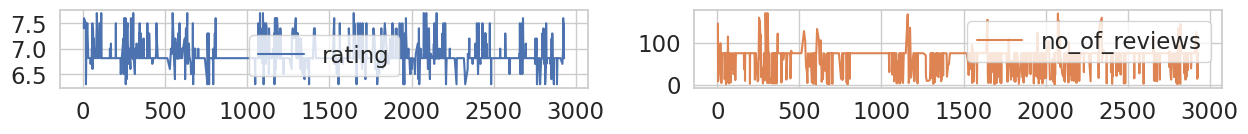

In [37]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

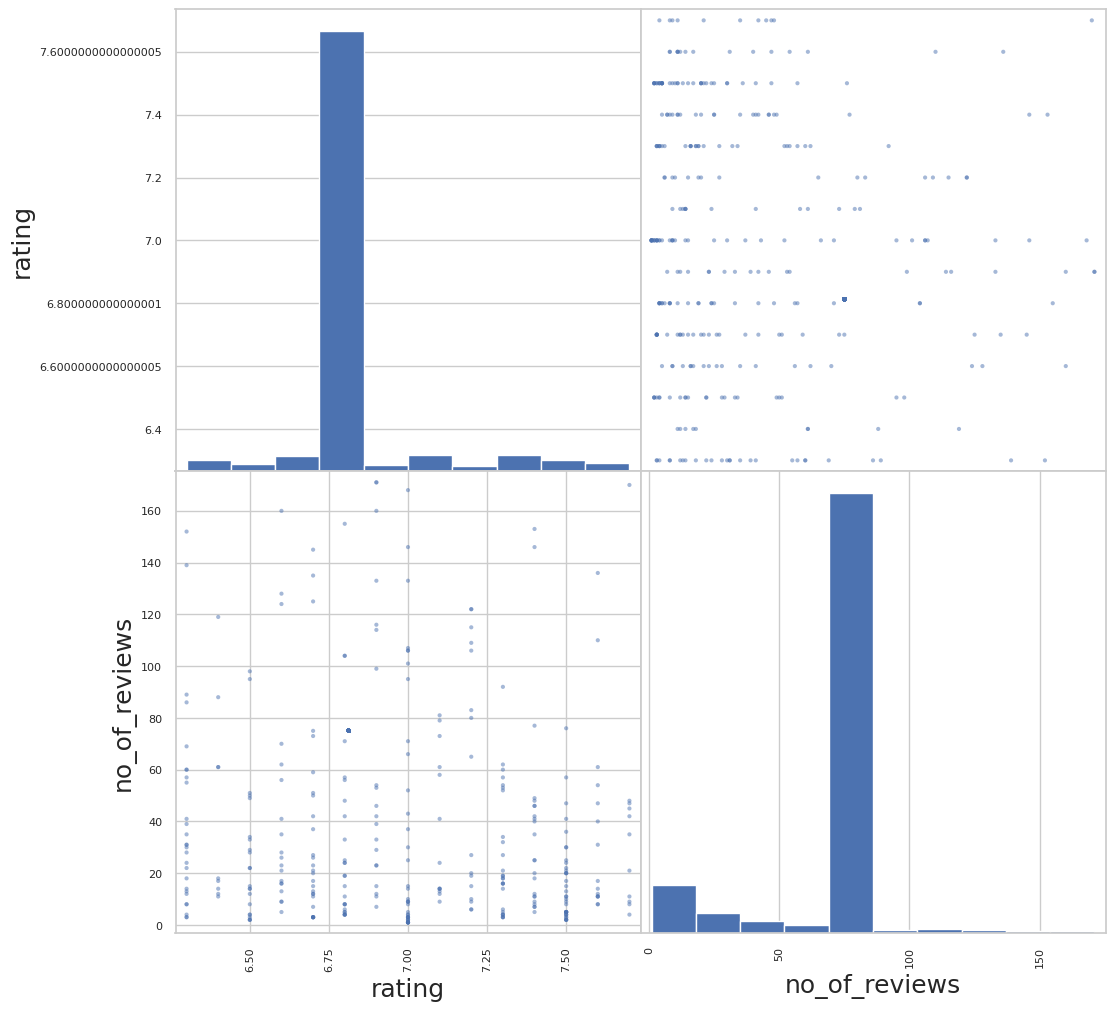

In [38]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-39-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


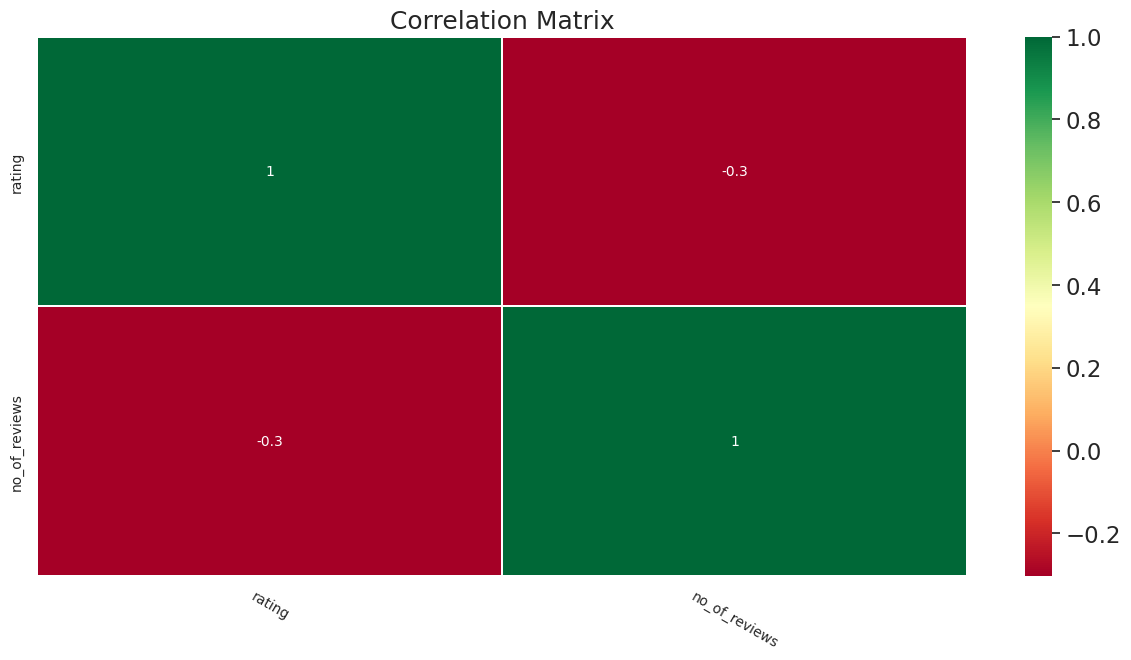

In [39]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [40]:
dataset3 = dataset

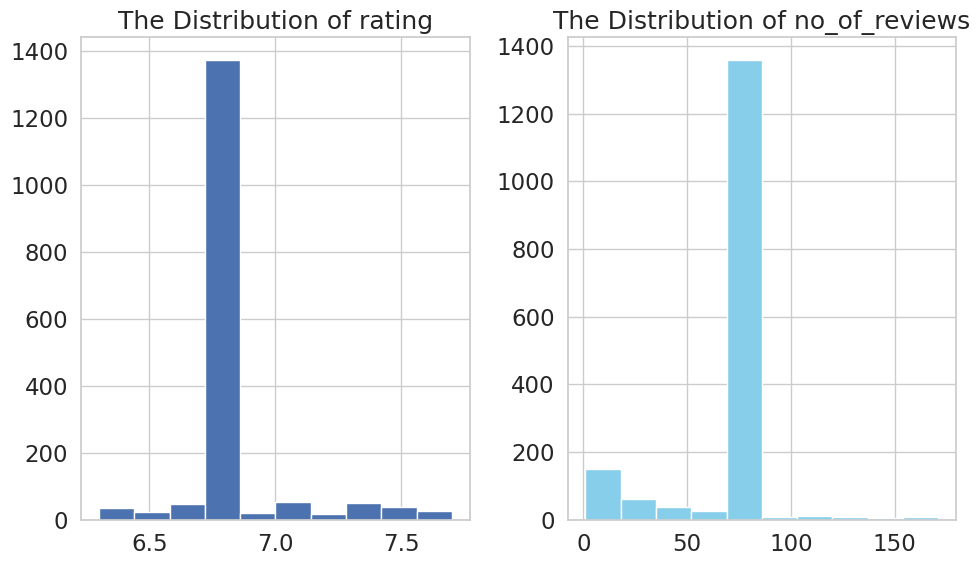

In [42]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset3['rating'])
ra1.set_title('The Distribution of rating')

ra2.hist(dataset3['no_of_reviews'], color = 'skyblue')
ra2.set_title('The Distribution of no_of_reviews')

plt.tight_layout() 
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [43]:
x = dataset.drop('drug_link', axis=1)
x

,drug_name,medical_condition,activity,csa,rating,no_of_reviews,medical_condition_url
4,clindamycin,Acne,39%,N,7.400000,146.000000,https://www.drugs.com/condition/acne.html
5,Aldactone,Acne,35%,N,7.600000,8.000000,https://www.drugs.com/condition/acne.html
16,Doryx,Acne,9%,N,7.500000,57.000000,https://www.drugs.com/condition/acne.html
17,tetracycline,Acne,9%,N,6.300000,55.000000,https://www.drugs.com/condition/acne.html
19,Solodyn,Acne,8%,N,6.900000,99.000000,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,2%,3,7.500000,17.000000,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,1%,4,6.812926,75.064943,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,0%,3,6.812926,75.064943,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,0%,N,6.812926,75.064943,https://www.drugs.com/condition/obesity.html


Choose feature Type as a label

In [44]:
y = dataset["drug_link"]
y

4       https://www.drugs.com/mtm/clindamycin-topical....
5                    https://www.drugs.com/aldactone.html
16                  https://www.drugs.com/cons/doryx.html
17                https://www.drugs.com/tetracycline.html
19                     https://www.drugs.com/solodyn.html
                              ...                        
2926         https://www.drugs.com/mtm/benzphetamine.html
2927          https://www.drugs.com/mtm/fenfluramine.html
2928           https://www.drugs.com/pro/fendique-er.html
2929                  https://www.drugs.com/imcivree.html
2930         https://www.drugs.com/mtm/setmelanotide.html
Name: drug_link, Length: 1677, dtype: object

In [45]:
y.values.reshape(-1,1)

array([['https://www.drugs.com/mtm/clindamycin-topical.html'],
       ['https://www.drugs.com/aldactone.html'],
       ['https://www.drugs.com/cons/doryx.html'],
       ...,
       ['https://www.drugs.com/pro/fendique-er.html'],
       ['https://www.drugs.com/imcivree.html'],
       ['https://www.drugs.com/mtm/setmelanotide.html']], dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [46]:
x = pd.get_dummies(x)
x

,rating,no_of_reviews,drug_name_7T Gummy ES Chewable Tablets,drug_name_A-G Profen,drug_name_A-Phedrin,drug_name_Abatuss DMX,drug_name_Abenol,drug_name_Abilify MyCite,drug_name_Abrilada,drug_name_Absorica,...,medical_condition_url_https://www.drugs.com/condition/osteoporosis.html,medical_condition_url_https://www.drugs.com/condition/pain.html,medical_condition_url_https://www.drugs.com/condition/pneumonia.html,medical_condition_url_https://www.drugs.com/condition/psoriasis.html,medical_condition_url_https://www.drugs.com/condition/rheumatoid-arthritis.html,medical_condition_url_https://www.drugs.com/condition/schizophrenia.html,medical_condition_url_https://www.drugs.com/condition/seizures.html,medical_condition_url_https://www.drugs.com/condition/swine-flu.html,medical_condition_url_https://www.drugs.com/condition/urinary-incontinence.html,medical_condition_url_https://www.drugs.com/condition/urinary-tract-infection.html
4,7.400000,146.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7.600000,8.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,7.500000,57.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,6.300000,55.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,6.900000,99.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,7.500000,17.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2927,6.812926,75.064943,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2928,6.812926,75.064943,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2929,6.812926,75.064943,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x.shape

(1677, 1843)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [48]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842
0,2.807973,3.354524,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,...,-0.123017,-0.351058,-0.195934,-0.200805,-0.098147,-0.073455,-0.12792,-0.042333,-0.064743,-0.130307
1,3.827325,-2.542729,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,...,-0.123017,-0.351058,-0.195934,-0.200805,-0.098147,-0.073455,-0.12792,-0.042333,-0.064743,-0.130307
2,3.317649,-0.448777,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,...,-0.123017,-0.351058,-0.195934,-0.200805,-0.098147,-0.073455,-0.12792,-0.042333,-0.064743,-0.130307
3,-2.798460,-0.534244,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,...,-0.123017,-0.351058,-0.195934,-0.200805,-0.098147,-0.073455,-0.12792,-0.042333,-0.064743,-0.130307
4,0.259594,1.346039,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,...,-0.123017,-0.351058,-0.195934,-0.200805,-0.098147,-0.073455,-0.12792,-0.042333,-0.064743,-0.130307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,3.317649,-2.158125,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,...,-0.123017,-0.351058,-0.195934,-0.200805,-0.098147,-0.073455,-0.12792,-0.042333,-0.064743,-0.130307
1673,-0.184203,0.323206,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,...,-0.123017,-0.351058,-0.195934,-0.200805,-0.098147,-0.073455,-0.12792,-0.042333,-0.064743,-0.130307
1674,-0.184203,0.323206,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,...,-0.123017,-0.351058,-0.195934,-0.200805,-0.098147,-0.073455,-0.12792,-0.042333,-0.064743,-0.130307
1675,-0.184203,0.323206,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,-0.024427,...,-0.123017,-0.351058,-0.195934,-0.200805,-0.098147,-0.073455,-0.12792,-0.042333,-0.064743,-0.130307


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [49]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842
0,0.785714,0.852941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.928571,0.041176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.857143,0.329412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.317647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.428571,0.576471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,0.857143,0.094118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1673,0.366375,0.435676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1674,0.366375,0.435676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675,0.366375,0.435676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4.3 Splitting**

In [50]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y = make_blobs(n_samples=1000)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=1, stratify=y)

In [51]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 224, 1: 223, 2: 223})
Test distribution Counter({0: 110, 1: 110, 2: 110})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [52]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [53]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.947761 (0.021370)


In [54]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [55]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.9424242424242424


[[110   0   0]
 [  0 102   8]
 [  0  11  99]]


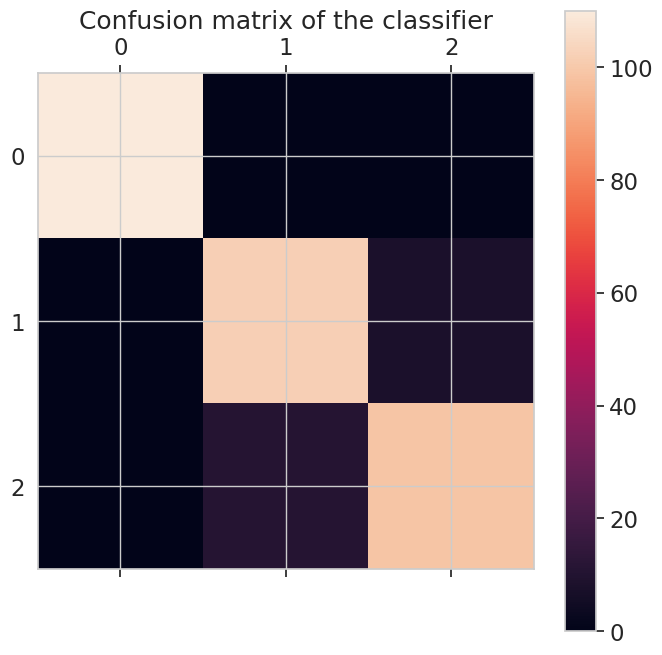

In [56]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [57]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       0.90      0.93      0.91       110
           2       0.93      0.90      0.91       110

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

